## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 33
np.random.seed(random_seed_number)

In [ ]:
##################################################
#wait what does this second part of random seed do???

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [92]:
diabetes_data.BloodPressure.describe().round(1)

count    733.0
mean      72.4
std       12.4
min       24.0
25%       64.0
50%       72.0
75%       80.0
max      122.0
Name: BloodPressure, dtype: float64

In [93]:
diabetes_data.BMI.describe().round(1)

count    757.0
mean      32.5
std        6.9
min       18.2
25%       27.5
50%       32.3
75%       36.6
max       67.1
Name: BMI, dtype: float64

In [ ]:
#WAIT WHATTHA!!!!!! the *25th* is 27.5?!?! 25 IS OVERWEIGHT!!! 30 IS OBESE!!!!!

**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
#only numbers - ints & floats
#note! outcome is BINARY - didn't we have this dataset before? or similar

# diabetes_data.unique()
#oh lol, doesn't do it for ALL columns like i thought it would
#OH YEAH! that's what *N*UNIQUE IS FOR!!!!!
diabetes_data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
diabetes_data.shape

(768, 9)

In [ ]:
#no nulls

**<font color='teal'> Apply the describe function to the data.</font>**

In [9]:
# round(diabetes_data.describe()) #can you put a number for decimal places? this had one decimal place but was always 0, so was just basically rounding to nearest int? confusing

diabetes_data.describe().round(1)
#nice use of round! to clean this up!

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [6]:
#######################################################################################
#OHHH! good catch! so yeah! can't just go based off of if there's nulls or not!!!!

In [58]:
######################################################
#VERY NICE!!!!

#oh shoot wait just noticed the error lol, so it stops @ bmi, meaning, based on col order,
#'DiabetesPedigreeFunction' doesn't have any zeros
#Must be an easy way to count number of 0's in each column?

feats = diabetes_data.columns

print("Number of 0 values for each column:")
for feature in feats:
    zero = diabetes_data.value_counts(feature).loc[0]
    # print("There are %d" %zero) + feature
    print("     {}: {}".format(feature, zero))

Number of 0 values for each column:
     Pregnancies: 111
     Glucose: 5
     BloodPressure: 35
     SkinThickness: 227
     Insulin: 374
     BMI: 11


KeyError: 0

In [61]:
#############################################
feats = diabetes_data.columns

print("Number of 0 values for each column:")
for feature in feats:
    zeros = (diabetes_data[feature] == 0).sum()
    # print("There are %d" %zero) + feature
    print("     {}: {}".format(feature, zeros))

Number of 0 values for each column:
     Pregnancies: 111
     Glucose: 5
     BloodPressure: 35
     SkinThickness: 227
     Insulin: 374
     BMI: 11
     DiabetesPedigreeFunction: 0
     Age: 0
     Outcome: 500


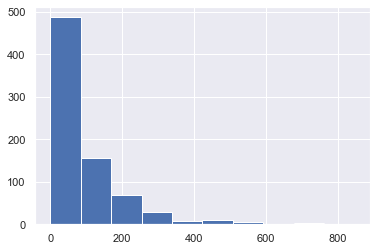

In [64]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!!!!!! BINGO!!!!!!

#and remember, OUTCOME is the one that FOR SURE we EXPECT there to be zeros!!!! cuz only 0/1

#So we gotta wonder/ask ourselves, for which of these would/could 0 be legit, and
#for which is it probably an error/blank/missing??

#MORE THAN LIKELY FOR *INTEGER* VALUE FIELDS ESPECIALLY - specifically things that HAVE to be
#integers, like Pregnancy, IT COULD VERY WELL BE LEGIT 0s!!!! esp since there are SO MANY!
#So note this probably doesn't go for things that are integers but don't NEED to be -
#examples we have here of that are *skin thickness & insulin*! integers and have many zeros.....
#so those might ACTUALLY be missings!!!!! cuz no reason / doesn't make sense for those to be 0's!
#BMI OF 11 OBVY DOESN'T MAKE SENSE!

########OH!!!! just realized lol - THESE ARE ALL IN THE COLUMNS THEY TELL US TO REPLACE THE
#ZEROS WITH NAN!!!!!!
#And their list also includes Glucose, which i didn't pick up on cuz it has so FEW zeros,
#in fact, the LEAST out of ones that have any, so didn't ring/trigger my alarm/bells,
#but yes - wouldn't make sense to have 0 glucose lollll at least for someone alive! Ya Allah please don't take us until You're most pleased with us!

#their list also includes BMI & PedigreeFunction which actually *ARE* decimals/floats - the only ones
#out of all columns in fact, so those DEFINITELY must be bogeys!!!!! lol bogus / bogues like
#Mugsy Bogues/Bones ;P!!!!!!

#a BIG CLUE to that is to look at the *DIST* or ordered layout of these!!!!!! if there's a BIG
#GAP between 0 and the next smallest value, then 0's probably are blanks!!! ESP IF THERE
#ARE THIS MANY YOU CAN PRETTY MUCH BE SURE!!!!!!

diabetes_data['Insulin'].hist();

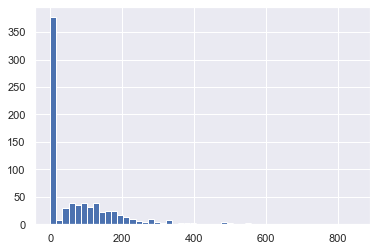

In [67]:
#okay so, problem w/ hists is it's gonna BUCKETIZE range from 0 to next set/density of values!
#so not useful - so better to look at either very small buckets, or just ORDERED LIST!

diabetes_data['Insulin'].hist(bins=50);

In [69]:
#nuff said. case closed lol
#wasn't expecting to have to go nearly this far out! crazy range!!!
#but just to show list:
diabetes_data['Insulin'].sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [70]:
#yep, there you have it.
#but i wanna see next biggest val lol, so guess have to do values_count

diabetes_data['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [ ]:
#WOW!!! yeah so next smallest value is *105*!!!!!!!

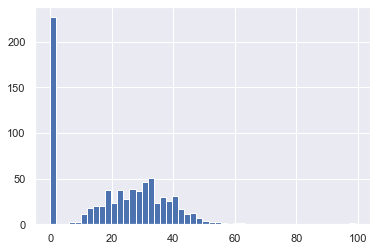

In [71]:
#now skin thickness!
diabetes_data['SkinThickness'].hist(bins=50);

In [72]:
#no doubt!
diabetes_data['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [ ]:
#yepperooo! next highest thirty-twoooo! ;P
#AH

**<font color='teal'> Plot histograms of each column. </font>**

In [ ]:
#####
#*THIS IS PRE-REPLACING 0'S WITH NANS!*#
#####

In [16]:
# diabetes_data.columns.values

In [15]:
# sns.displot(diabetes_data,row=diabetes_data.columns)#.values)

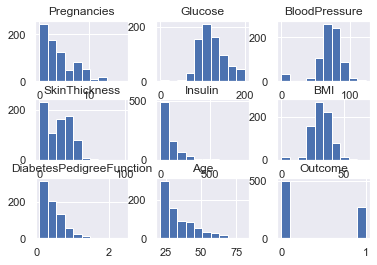

In [22]:
# plt.figure(figsize=(40,20));
diabetes_data.hist();

In [ ]:
#okay, good quick hit / fix aH

In [77]:
#Replace 0's in following columns w/ nanas

#but first!
diabetes_data_restore0 = diabetes_data.copy()

replacees = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [78]:
diabetes_data[replacees]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [86]:
diabetes_data[replacees] = diabetes_data[replacees].replace(0,np.nan)
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


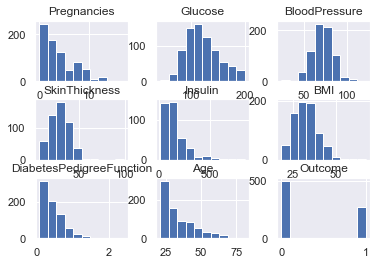

In [87]:
#now let's check the dist again! remem - *ZEROS* show up, but NANS *DON'T*!!!!!

diabetes_data.hist();

In [ ]:
#OH lol just realized, it's *5 in a row*! so easy to remember which ones we worked on!

In [ ]:
#okay aH! so you have to look closely, but the 5 features we removed the non-legit
#0's from's dists have now changed! note - for some there IS still a bar ALL the way on the
#the left, which you might think means there's still 0's but remem these are BINS, so it
#could be just small values, or DECIMALS especially! like PedigreeFunc - but yeah like BMI
#are you know like start in the 20's or high teens typically so might just be that
#they start w/ the lowest values and shove those all to the left!
#you see the first hash/label/tick is *25! not to mean that's the '0' line of course
#blood pressure doesn't start all the way to the left, but maybe that's cuz those tend to be
#def higher values than BMI, like in 60's+, or at least like 40s (in fact *VERY* least is
#24 which would be a *HIGH* BMI!!!!!) but 25th pct is *64*!!!!!! so yeah 24 is prob EXTREME!!!

#### Replace the NaNs with mean and median values.

In [88]:
####NOTE!!! they wrote replace the 'zeros', but we replaced the zeros w/ Nans, now,
#if you look at the code they put below, they want us to replace those nans w/ me(di)ans!
#BUT THEN WE COULDA JUST DONE THAT *DIRECTLY*!!!!????
#but yeah - if we replaced ZEROS now, the only zeros there would be left to replace would
#be the LEGIT ones that we obvy DIDN'T CHANGE TO NANS!!!!!

In [94]:
#lol not so fast partner!
diabetes_data_restore1 = diabetes_data.copy()

In [95]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [96]:
#means
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)

#medians
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [97]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
#AH!!!

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

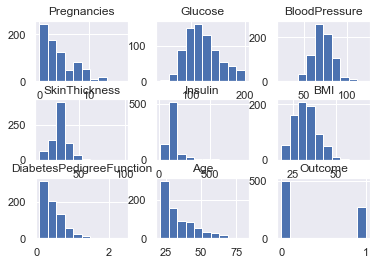

In [98]:
diabetes_data.hist();

In [ ]:
#so note some's dist didn't change a whole lot, maybe cuz very few 0/nans like Glucose,
#and/or relatively EVEN/SYMMETRICAL to begin with, like BP & BMI, so adding a bunch of means
#i guess KEEPS it even, just beefs up MIDDLE more? >> #OH!! notice these are the ones we
#did MEAN to vs. median!!!!

#and ones that were skewed in some way - like i guess SkinThick & Insulin - so
#skinthick was 'symmetrical' but just VERY mean/median heavy, and interestingly... adding MORE
#medians somehow evened it out??? lolf
#and insulin was def ONE-sided skewed, w/ a LOW mean & median, so makes sense that we'd add to
#its middle to attempt to even out - it's still skewed but better i guess?

#what goes behind the decision whether to use mean vs. median to fill? i know outliers,
#which we didn't specifically look at here. but from quick look - seems like breakdown
#was maybe 'even' dist vs. SKEWED dist????
############################################################################################

In [99]:
diabetes_data_restore2 = diabetes_data.copy()

In [104]:
diabetes_data.Age.describe().round(1)

count    768.0
mean      33.2
std       11.8
min       21.0
25%       24.0
50%       29.0
75%       41.0
max       81.0
Name: Age, dtype: float64

#### Plot the correlation matrix heatmap

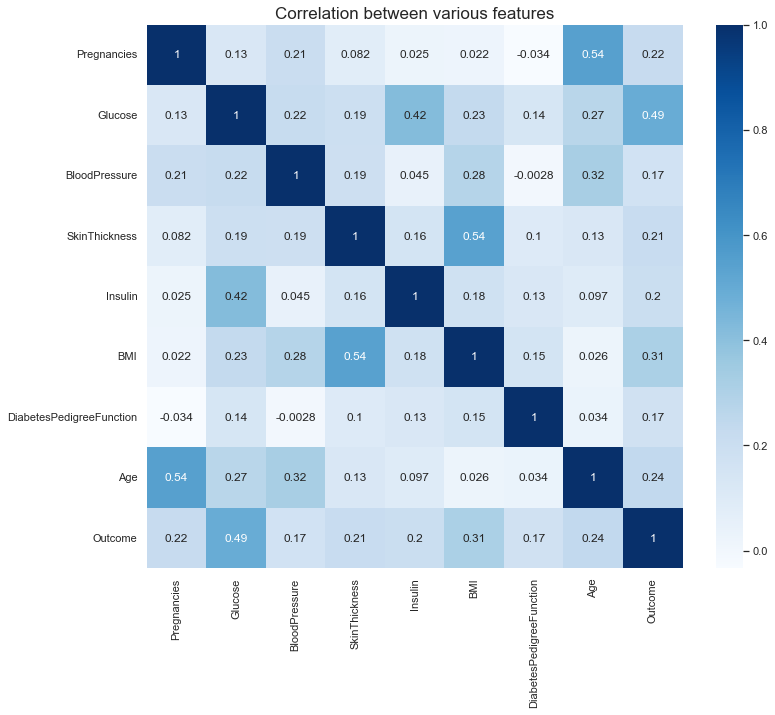

In [102]:
plt.figure(figsize=(12,10))
plt.title('Correlation between various features',fontsize=17)
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')
#eyyyy! finally using SEABORN!!!! atta boy!

In [ ]:
#okay so like Age & Pregnancies vary together - that's the HIGHEST - actually,
#that's tied w/ BMI & SkinThiqq @ .54!!!!
#Note these correlations are ONLY positive, so we don't
#know from looking if positive or NEGATIVE correlation - but for Age vs. Pregnancy, obvy
#assumably tends to go UP with age!!!! like older women will tend to have
#more pregnancies under their belt!
#but wait - so are ALL THESE *WOMEN* THEN?!?! cuz if there's MEN, then the 0
#pregnancies will REALLY THROW THINGS OFF!!!!!

#i guess makes sense to LITERALLY lol have thicker SKIN cuz of more fat if higher BMI!

#glucose & outcome (aka diabetes diagnosis) pretty closely tied together - makes sense

#glucose & insulin ofc close-ish-ly tied, though you'd expect higher?

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [105]:
y = diabetes_data['Outcome']

In [108]:
#lol what about X honey?? ;P
X = diabetes_data.drop('Outcome',axis=1)

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [124]:
#LEMME TRY TO DO EVERYTHING THEY WANT US TO DO IN 1!!!!

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": np.arange(1,11)} #exclusyv

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=random_seed_number,stratify=y)

gs = GridSearchCV(pipeline, param_grid=parameters)
#good job! didn't bother specifying cv as integer OR as kf!!!

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test) #do we even need this for our use? dep. on which score we use

print("The top-performing k-value was {} with a score of {}".format(str(gs.best_params_).split(": ")[1].split("}")[0], gs.best_score_.round(3)))
                                                                #OR USE gs.best_index_ + 1
################################################################################################

The top-performing k-value was 7 with a score of 0.754


In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!!!!!!

In [123]:
str(gs.best_params_).split(": ")[1].split("}")[0]


'7'

In [161]:
gs.best_index_ + 1

7

In [ ]:
#OH DANG!!!!!! COULDA JUST USED THIS!!!!!!!!!!!!!!!!!!!!!!!! AH!

In [ ]:
#so, this is a case where we only cycled thru ONE hyper param, and also DIDN'T opt for
#kfCV, yet still used GridSearch
#So remem - normally we think of using GridSearch because we wanna try out values for MULTIPLE
#hyperparameters. But remem - we said that we can still use GS even if only looking at
#*ONE* hyperparam, because the alternatives are using kfCV or making a manual FOR-LOOP right
#And so, if we DON'T want to use kfCV, which is totally fine since that isn't necessary,
#THEN YEAH IT'D STILL MAKE SENSE TO USE GS CUZ THAT'D SAVE US FROM USING A FOR-LOOP!!!!
#lol it's like using the moving walkway or elevator EVEN IF you don't have bags -
#IT'S STILL QUICKER / EASIER / SAVES YOU TIME/ENERGY!!!!!!!

##########################################################################################

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [18]:
#Soo... I'm guessing since i did automated way using Pipeline... IT TOOK CARE OF THAT FOR
#ME AUTOMATICALLY?!?

##########################################################################################

In [127]:
#Oh they wanna see the list of scores for both train & test...

#there was an option to view all wasn't there? something like that... look back
#oh wait, but if they're starting w/ an empty list, that means they wanna APPEND,
#which means ITERATION,... but i thought gridsearch like BAILS US OUT of having to do
#iteration aka cuz IT does it FOR us!
#and how would we see the train scores from gs...

gs.cv_results_

{'mean_fit_time': array([0.00136824, 0.00133343, 0.00135365, 0.00118499, 0.0012002 ,
        0.00128207, 0.00130763, 0.00129776, 0.00125546, 0.00127439]),
 'std_fit_time': array([1.10643422e-04, 1.13474961e-04, 1.71587955e-04, 6.00647146e-05,
        5.39081226e-05, 2.00184656e-04, 1.53837349e-04, 7.35928911e-05,
        1.37784273e-04, 4.54612155e-05]),
 'mean_score_time': array([0.00177622, 0.00180659, 0.00183778, 0.00176015, 0.00179901,
        0.00183759, 0.00206175, 0.00189505, 0.00202103, 0.0019258 ]),
 'std_score_time': array([4.26226809e-05, 1.12668720e-04, 1.31729870e-04, 5.03995899e-05,
        6.02274967e-05, 1.09641402e-04, 2.04656353e-04, 3.47563592e-05,
        2.34723322e-04, 1.74646125e-05]),
 'param_knn__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'knn__n_neighbors': 1},
  {'

In [131]:
gs.cv_results_['split4_test_score']

array([0.74766355, 0.74766355, 0.78504673, 0.77570093, 0.79439252,
       0.79439252, 0.77570093, 0.74766355, 0.75700935, 0.76635514])

In [ ]:
#hmmm - so did it like STILL do kfCV anyway?? like auto did 5 splits for EACH of the 10
# k values??????

#so below mean test score is the average test score ACROSS THE 5 SPLITS for EACH of the 10
#k values????

In [128]:
gs.cv_results_['mean_test_score']

array([0.69293873, 0.72270682, 0.72644514, 0.73014884, 0.74132918,
       0.75057113, 0.75432676, 0.73573901, 0.74873659, 0.74312911])

In [ ]:
#but yeah! we see the .754 @ k=7!!!!!!

In [ ]:
#to show TRAIN scores in this cv_results w/ gs, you gotta do/set 'return_train_score = True'!!!!

In [139]:
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": np.arange(1,11)}

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=random_seed_number,stratify=y)

gs = GridSearchCV(pipeline, param_grid=parameters, return_train_score=True)

gs.fit(X_train, y_train)

# y_pred = gs.predict(X_test)

# print("The top-performing k-value was {} with a score of {}".format(str(gs.best_params_).split(": ")[1].split("}")[0], gs.best_score_.round(3)))

ks = range(1,11)

train_scores = gs.cv_results_['mean_train_score']

test_scores = gs.cv_results_['mean_test_score']

results = pd.DataFrame({'k': ks, 'train_score': train_scores, 'test_score': test_scores}).style.hide_index()
#hmm harder to truncate many columns at once?
################################################

results

k,train_score,test_score
1,1.000000,0.692939
2,0.846838,0.722707
3,0.852420,0.726445
4,0.821228,0.730149
5,0.838928,0.741329
6,0.820298,0.750571
7,0.829151,0.754327
8,0.811459,0.735739
9,0.814262,0.748737
10,0.800759,0.743129


In [143]:
type(results)
#ohhh - IS IT CUZ I MADE

pandas.io.formats.style.Styler

In [144]:
results_df=pd.DataFrame({'k': ks, 'train_score': train_scores, 'test_score': test_scores})

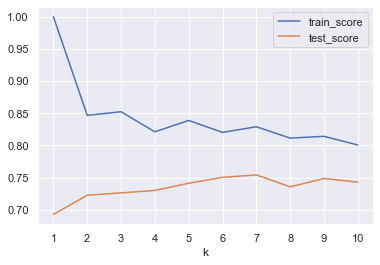

In [156]:
# results_df[['train_score','test_score']].plot();
# results.plot(x=ks,y=train_scores)
# results.plot(x=ks,y=test_scores)

#oops! would be better to make the xlabels match the k's!:

# plt.figure(figsize=(20,10)) #hain? how come didn't work... but works for them...
results_df.plot(x='k')
plt.xticks(range(1,11));
#ALHAMDULILLAH!!!!!

In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!!!!!

#BUT DO WE DO LIKE *ELBOW* / TRADE-OFF W/ KNN?????? forget!

#BUT YEAH! AS WE SHOWED! BEST TEST PERFORMANCE IS ON/@ k=7 NEAREST NEIGHBORS!!!!!!

##########################################################################################

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [28]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))



#WOOOOW! BUT YOU DIDN'T EVEN SCALE/STANDARDIZE *OR* USE GRIDSEARCH!!!!! just straight iteration!

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [29]:
#did

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [30]:
#Of course max score of TRAINING will always be at k=1 for PERFECT SCORE OF 1.0! Because PERFECTLY OVERFIT!

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [31]:
#7

Plot the train and test model performance by number of neighbors.

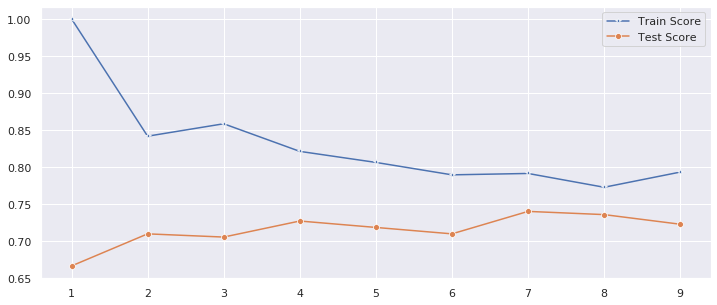

In [33]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

In [ ]:
#WOOOOOOW! lol the ONE time i don't use sns!!!! they do!!!!
#i like this better w/ the DOTS pronounced!

In [ ]:
#NOTE! theirs does look a little different, BUT THAT'S CUZ DIFFERENT RANDOM STATE!!!
#lol oops - shoulda stuck to that - didn't think of that, for comparing results EXACTLY!
#even tho as we know normally we don't look at TRAINING results/perf cuz want
#MAX *GENERALIZABILITY*!!!!!! that's what it's all about!!!!!

In [157]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [158]:
gs.best_params_

{'knn__n_neighbors': 7}

In [159]:
gs.best_index_

6

In [160]:
gs.best_index_ + 1

7

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [162]:
#oh okay so this is using the WINNER like we did! for final performance... oh wait, but
#that was w//for kfCV when we had a FINAL *RESERVE* SET!

#oh wait nvm same thing still applies - like yes the example im thinking of was kfCV
#but point is we just needa redo the WINNER so that we ONLY have ITS fit so we can
#do other stuff w/ it like see its specific performance on diff metrics!

#real simple!

best_k = gs.best_index_ + 1

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=best_k))]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)

pipeline.score(X_test,y_test)

0.70995670995671

In [ ]:
#hmmm, IS THIS SCORE SUPPOSED TO BE DIFFERENT LIKE THIS THAN OUR ORIGINAL?!?!
#cuz not like a random state thing?? or is it??

############################################################################

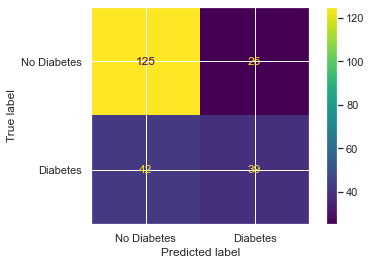

In [175]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = pipeline.predict(X_test) #yes! need for this!
confmx = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay(confmx,display_labels=['No Diabetes', 'Diabetes']).plot();

In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       150
           1       0.61      0.48      0.54        81

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.66       231
weighted avg       0.70      0.71      0.70       231



**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [36]:
#done

**<font color='teal'> Print the classification report </font>**

In [37]:
#done

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#wait why is there an 'n_neighbors' arg within GridSearchCV() and why is it 5??
############################################################################

In [197]:
#0: NO K-FOLD CROSS-VALIDATION! *JUST* OVERALL TRAIN/TEST SPLIT, using manual iteration for diff k's - what they did the first time!
    #so like just ONE overall training set/fit, then ONE test!!!
    #JUST 'ONE-N-DONE'!

#but ofc now we're gonna do w/ the FULL range!

test_scores = []
ks = []

for k in range(1,51):

    knn = KNeighborsClassifier(k) #oh nice! didn't even need to write out arg!
    knn.fit(X_train,y_train)
    ks.append(k)
    test_scores.append(knn.score(X_test,y_test))
    #NOTE THIS IS JUST '.SCORE' AKA A *SINGLE SCORE* AND *NOT* '.CROSS_VAL_SCORE'
    #CUZ WE'RE *NOT DOING THAT KIND OF CROSS-VALIDATION*!!!!! JUST STRAIGHT UP TRYING
    #EACH PARAM VALUE *ONCE*!!!!!!

scores_df = pd.DataFrame({'k':ks,'score':scores})

scores_df.query('score == score.max()').style.hide_index()

k,score
21,0.759761


In [ ]:
#WHOAAAAA! sA!!!!! SO THIS TOO GIVES US THE EXACT SAME RESULTS?!?! NO CROSS-VALIDATION AT ALL?!?!
################################################################################################

In [190]:
#waaaaaaaaaaaaaait a minute!!!!!! so 'cv' is one of the args of GridSearch?!
#and i looked it up and actually the default *IS* 5?!?! AND THAT'S EXACTLY WHAT WE SAW
#WHEN WE LOOKED AT CV_RESULTS?!?!?! AND IT SAYS THE DEFAULT *IS* KFOLD CROSS VALIDATION!!!!!

#WOOOOOW! i mean yeah, it makes sense CUZ IT IS CALLED *CROSS-VALIDATION* AFTER ALL!!!!!
#oh wait nvm cuz i was thinking then that could just mean / also just be referring to TRYING
# / COMPARING DIFFERENT VALUES FOR HYPERPARAMETERS!!!! REMEM - THIS IS *HYPERPARAMETER **TUNING****!!!!!!

#so, okay, gotta tweak what we said then - GridSearch *DOES* NECESSARILY DO KFOLDCV THEN!!!!!
#WHAT WAS IT THAT MADE ME THINK IT *DIDN'T*?!?!?!??!?!?!?!?!?!?!?!?!?!
#MANNNNNNNN! NOW I GOTTA GO BACK AND *RE*CHANGE EVERYTHING?!?!?!??!!??!??!?!!??!!?!? AM I SURE
#ABOUT THIS?!?!?!?!?!?!?!?!?!??!!? but yeah documentation and what we saw clearly show it
#talks about 5-fold as standard! but then why is that the meaning of 'None'????

#anyway - so yeah, even if we have ONE hyper param we're checking out - then.... okay wait,
#so yeah then what IS the diff b/w GridSearch & kfCV?!?!?!?!?!!??!

#kfold tries each parameter value for a single hyperparam, does 5-folds for each one, etc
#it does have the hold-out set tho

#maybe that's the only diff?? like maybe gscv doesn't do hold-out reserve?

#gscv w/ one param, tries all the vals and... yeah does 5 splits for each val

#SO YEAH IS THERE ANY DIFFERENCE?!?! oh wait - but i noticed that we don't bother
#w/ TRAIN & TEST at all here?!?


#hmmmmmmmmmmmmmmmm. okay. so it seems for their first way they did just straight ITERATION
#and SINGLE train test split and compared the test scores

#then for grid search, all they do is kfCV

#lets compare kfCV vs. GridSearch here; AND THEN I THOUGHT WE DID IT WHERE WE ACTUALLY *COMBINED*
#GRID SEARCH & KFCV SEPARATELY WHICH IS WHAT MADE ME THINK WE CAN DO GRIDSEARCH *WITHOUT* CV!!!!!

#hmmmmmmmmmmmmmmmmmmmmmm okay wow, it's really confusing. maybe like things changed - but,
#we were def trained in datacamp to where you could:



# 0. NO CROSS-VALIDATION! *JUST* OVERALL TRAIN/TEST SPLIT, using manual iteration for diff k's - what they did the first time!
    #so like just ONE overall training set/fit, then ONE test!!!
# THEN THESE OTHER 3 OPTIONS ARE *WITH* CROSS-VALIDATION!
# 1. use kfold by itself (with manual iteration) - could do overall X/y or train/test
# 2. use gridsearch WITH kfold - saw this in datacamp - this SHOULD be the same as #3?!?! &#1 too?!
# 3. use gridsearch BY ITSELF - what we both did, except i didn't specify cv=5, but IT SHOULD HAVE DEFAULTED TO THAT ANYWAY!!!!!
    #BUT ALSO!!!!!! I TOOK EXTRA STEP OF KEEPING A *RESERVE* FINAL TEST SET AND *THEY DIDN'T*!!!!!! USED THE *WHOLE THING* FOR KFCV!!!

#but now it seems like IT'S ALL THE SAME THING!!!!!!!

#so what we did above was #3, but again, it seems like the DEFAULT for gscv is 5-fold kfCV!!!!
#so if we try it with #1 & #3, we should get the same thing??



#1: kfold by itself - you need MANUAL iteration - i'm just gonna use WHOLE dataset
# this SHOULD be the same as using grid search or gridsearch + kfCV! we'll see!

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(shuffle=True,random_state=33)

#OH - but remem - we may not get exact same results cuz there's RANDOMNESS INVOLVED!!!
#and unless doing EXACT SAME model, WON'T GET EXACT SAME RESULTS W/ SAME RANDOM SEED!!!!!

scores = []
ks = []

for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn,X,y,cv=kf).mean())
    ks.append(k)
    #to make it easy we're just doing OVERALL X/y!!!
    #but strictly speaking you should just do this on X_TRAIN/y_TRAIN!!!!!

scores_df = pd.DataFrame({'k':ks,'score':scores})

scores_df.query('score == score.max()').style.hide_index()

k,score
29,0.752704


In [196]:
#1B: let's try w/ just train to see in case any diff?

from sklearn.model_selection import KFold, cross_val_score

kf = KFold(shuffle=True,random_state=33)

scores = []
ks = []

for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn,X_train,y_train,cv=kf).mean()) #they MOSTLY did this on train!!!
    ks.append(k)

scores_df = pd.DataFrame({'k':ks,'score':scores})

scores_df.query('score == score.max()').style.hide_index()

k,score
21,0.759761


In [ ]:
#BTW! NOTE ALL THIS IS WITHOUT SCALING!!! skipping that part for now!

In [195]:
# 2. use gridsearch WITH kfold - saw this in datacamp - this SHOULD be the same as #3?!?!

from sklearn.model_selection import KFold

knn = KNeighborsClassifier()

kf = KFold(shuffle=True,random_state=33)

params = {"n_neighbors": np.arange(1, 51)}

gskcv = GridSearchCV(knn, params, cv=kf)

gskcv.fit(X_train,y_train) #they ALWAYS did this on train!

gskcv.best_params_, gskcv.best_score_


({'n_neighbors': 21}, 0.759761163032191)

In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!!!!!!! EXACT SAME RESULTS AS #1B!!!!!!

In [ ]:
#OHHHHHHH! SO IF WE'RE USING GRIDSEARCH *WITHOUT* A PIPELINE THEN WE DON'T NEEDA WRITE
#'knn__n_neighbors' but rather JUST 'n_neighbors'!!!!! cuz that 'knn' is referencing the
#'knn' name we give in *STEPS*!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [203]:
#okay and finally, #3! which is what we already did, but this time just gonna expand the range! iA
#OH! and also this time gonna SKIP SCALING!!!!! to keep consistent w/ these 2 so can compare!

#3: GridSearch BY ITSELF! - should be the same as the above 2, aka USING 5-FOLD kFoldCV!!!!!!

params = {"n_neighbors": np.arange(1,51)}

knn = KNeighborsClassifier()

gs = GridSearchCV(knn, params)

gs.fit(X_train, y_train) #seems like they ALWAYS did this on train!!!

gs.best_params_, gs.best_score_

({'n_neighbors': 40}, 0.7412945655936309)

In [202]:
#hmmmmmmmmmmmm - interesting - so the high score & best k are different...
#############################################################################

#let's finally try what THEY did in the end, of the same thing but specifying cv!

#3A - OH! but we're gonna use Xtrain/ytrain again - remem, THEY USED *WHOLE* X/y FOR SOME REASON!??!

params = {"n_neighbors": np.arange(1,51)}

knn = KNeighborsClassifier()

gs = GridSearchCV(knn, params, cv=5)

gs.fit(X_train, y_train) #seems like they ALWAYS did this on train!!!

gs.best_params_, gs.best_score_



({'n_neighbors': 40}, 0.7412945655936309)

In [ ]:
#yep!!!!!! EXACT SAME THING! SO YEAH - CV=5 BY DEFAULT!
#but what's not clear is - is this the same as *kfCV=5*?!?!?! same score, diff k....

In [201]:
#3B

#Lastly, let's see if we get their result by using WHOLE X/y!

params = {"n_neighbors": np.arange(1,51)}

knn = KNeighborsClassifier()

gs = GridSearchCV(knn, params)

gs.fit(X, y) #seems like they ALWAYS did this on train!!!

gs.best_params_, gs.best_score_

({'n_neighbors': 31}, 0.7526440879382056)

In [204]:
#wait this is diff than what they got... let's try specifying cv=5 like they did?

#3B2

params = {"n_neighbors": np.arange(1,51)}

knn = KNeighborsClassifier()

gs = GridSearchCV(knn, params, cv=5)

gs.fit(X, y) #seems like they ALWAYS did this on train!!!

gs.best_params_, gs.best_score_

({'n_neighbors': 31}, 0.7526440879382056)

In [208]:
#now that we figured out the stratify thing! should be able to match 3B/2 results:

#3X

params = {"n_neighbors": np.arange(1,51)}

skf = StratifiedKFold()

knn = KNeighborsClassifier()

gs = GridSearchCV(knn, params, cv=skf)

gs.fit(X, y) #seems like they ALWAYS did this on train!!!

gs.best_params_, gs.best_score_

({'n_neighbors': 31}, 0.7526440879382056)

In [ ]:
#THERE IT IS ALHAMDULILLAHI RABBIL 'AALAMEEN!!!!!

In [ ]:
#okay at least that's same - so i guess just random state issue...
#but how could the k's vary that drastically?!?!?!
######################################################################

In [206]:
#4X

#okay, so last thing is - let's try matching the results of #3 manually
#by doing kfold WITHOUT stratifying & shuffling! rest same. so will build using #2! but modified from that


from sklearn.model_selection import KFold

knn = KNeighborsClassifier()

kf = KFold()

params = {"n_neighbors": np.arange(1, 51)}

gskcv = GridSearchCV(knn, params, cv=kf)

gskcv.fit(X_train,y_train) #they ALWAYS did this on train!

gskcv.best_params_, gskcv.best_score_



({'n_neighbors': 37}, 0.7468847352024922)

In [207]:
#dang...


#okay, so:
    #so if you use GridSearch WITHOUT specifying anything for cv, it's the same as specifying
    #cv=5 - we confirmed that
    #but it's not the same as kfold w/ shuffle
    #DOC says the integer you put in cv= for GridSearch arg will use STRATIFIED KFold
    #if y is BINARY or MULTICLASS, aka *DISCRETE/CATEGORICAL*!
    #AND IN THIS CASE IT IS!!!!! (otherwise it'll use REGULAR kfold)
    #but in either of those cases it DOESN'T shuffle!

#OHHH, so we gotta use STRATIFIED Kfold!!!!

#so this is SEPARATE from stratifying the TRAIN/TEST SPLIT!!!!!
#remem, kfold is splitting the TRAINING split!!!!!

#let's give it a whirl!!!!!

#4

from sklearn.model_selection import StratifiedKFold

knn = KNeighborsClassifier()

skf = StratifiedKFold() #shuffle False by default here too like reg KFold

params = {"n_neighbors": np.arange(1, 51)}

gskcv = GridSearchCV(knn, params, cv=skf)

gskcv.fit(X_train,y_train) #they ALWAYS did this on train!

gskcv.best_params_, gskcv.best_score_


({'n_neighbors': 40}, 0.7412945655936309)

In [194]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [185]:
scores_df

,k,score
0,1,0.716145
1,2,0.720058
2,3,0.716136
3,4,0.734411
4,5,0.738358
5,6,0.742212
6,7,0.737043
7,8,0.746185
8,9,0.746185
9,10,0.750081


In [ ]:
#ohhh.. but they said to go only till 10? and also THEY STILL DIDN'T STANDARDIZE?!
#and did they ever show that they avoided data leakage?!
################################################################################

In [210]:
########################################################################
#Okay so verdict is:
#GridSearch DOES ALWAYS use kfold cross validation
#but there are TWO DIFFERENT KINDS OF KFOLD!!!!!!
#there's regular, which is UNSTRATIFIED
#then there's a special STRATIFIED ONE!
#in either case, it will do it *UNSHUFFLED*!!!!!!

#What dictates which one to use is whether your y is DISCRETE OR CONTINUOUS!!!!
#if discrete, LIKE WE HAVE HERE, you use STRATIFIEDKFold
#you don't have to specify it - you can make it easy and simply leave it BLANK
#AND LET IT DO THAT FOR YOU!!!! don't even do cv=5! CUZ THAT'S DEFAULT!

#if continuous, then you needa use REGULAR KFold
#but again, if that's your situation, it'll do that for you

#so bottom line is - YOU REALLY SHOULD NEVER BOTHER SPECIFYING KFOLDCV!!!!!!
#JUST DON'T RISK IT!!!!! PLUS IT'S JUST MORE WORK FOR YOU!!!!
#LET IT HANDLE IT FOR YOU AUTOMATICALLY!!!!!
#like you can specify the CV *INTEGER* IF YOU LIKE, and it'll pass that on
#to the appropriate (Stratified)KFold for n_folds >> AHHHHHH! OKAY GET IT NOW WHY THEY WROTE IT LIKE THAT IN PARENTHS!!!!!!

#So yeah - confirmed that there's no such thing as using GridSearch with NO folds!!!
#you can do the WHOLE X/y i guess but that's not technically the right way! shame on them lol

#it'll ALWAYS do folds, it's just a matter of stratified vs. not

#so yeah, bottom line: *DON'T BOTHER SPECIFYING/INSTANTIATING (STRATIFIED/)KFOLD
#WITH GRIDSEARCH!!!!! IN FACT, DON'T EVEN SPECIFY CV!!!!! LEAVE THAT ALONE!!!!
#this will make sure the shuffling is right too
#but WAIT... so is it that you're NOT SUPPOSED TO SHUFFLE when using GridSearch....
#cuz it sounds like in EITHER case it turns shuffle off...
#whereas with kfold you actually have the choice...
#cuz so like if we use shuffle - whether manual iteration kfold or GRIDSEARCH kfold -
#GridSearch works and gives us the same answer as manual kfold iteration
#but when we DON'T shuffle / use native GSCV, it's a different answer...
#SO WHAT'S "RIGHT"?!?!?!??!?!??!?!?!?!?!?!?!?!?!?!??!?!??!??!?!??!??!!?!??!?!?!?!?!?!?!?!?!?!?

#note they didn't use Kfold.....
#So like - i def don't remember being taught this - but when we did manual iteration
#kfold, like why is it offered to set shuffle=True then?!
#cuz if you do manual iteration single score way (0) or manual kfold iteration way (1),
#obvy in 0 shuffling's not applicable cuz no folds, but in 1, like are we supposed to NOT
#use reg kfold but rather StratKFOLD?!
#in fact, let's try now!!!

#1B-StratKFold, No Shuffle! and ofc no random state cuz NOT APPLICABLE IF NO SHUFFLE! random state's whole purpose/existence is only for/contingent on shuffle!!!!! to retain/replicate!
skf = StratifiedKFold()

scores = []
ks = []

for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn,X_train,y_train,cv=skf).mean()) #they MOSTLY did this on train!!!
    ks.append(k)

scores_df = pd.DataFrame({'k':ks,'score':scores})

scores_df.query('score == score.max()').style.hide_index()


################################################################################

#YOU JUST FOCUS ON YOUR SCALING/IMPUTING/TRANSFORMATION & MODELING PARAMS GRID/MATRIX!!!!!!


#OH WOW!!!!!! so yeah just realized we coulda solved this WHOLE PROBLEM just in a few lines
#w/ pipeline building in IMPUTER!!!!!! to take care of nans! Oh wait - not quite tho - we
#stil woulda had to do first step manually of RECOGNIZING WHICH 0'S WERE LEGIT AND WHICH
#WERE PHONY!!!!! THAT'S WHERE THE DATA SCIENTIST'S MIND/JUDGEMENT COMES INTO PLAY!!!!!
#THEN THE REST IS SMOOTH SAILING, JUST PUSHING A FEW BUTTONS TO PUT/SLATE EVERYTHING INTO PLACE!!!!!

############################################################################################


k,score
40,0.741295


#### Print the best score and best parameter for n_neighbors.

In [93]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578125
Best Parameters: {'n_neighbors': 14}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [211]:
#follow the example in notes where we did the grand finale competition lol using 3 diff
#models

#SO I BELIEVE WE DON'T HAVE TO BOTHER SCALING IN FOREST RIGHT!!!

from sklearn.ensemble import RandomForestClassifier

steps = [('scaler', StandardScaler()), ('rf', RandomForestClassifier())]

pipeline = Pipeline(steps)

params = {"rf__n_estimators": np.arange(1,333)}
#HOW DO YOU KNOW HOW MANY TO TRY?!
#################################################

gs = GridSearchCV(pipeline, param_grid=params)
#nice cuz this takes care of the scaling / fitting / transforming for you and in the right way
#SO YOU DON'T HAVE TO WORRY ABOUT IT!!!!!

gs.fit(X_train,y_train)

print("The ideal number of estimators out of the ones tested is {}, with a score of {}".format(str(gs.best_params_).split(": ")[1].split("}")[0], gs.best_score_.round(3)))
                                                                #OR USE gs.best_index_ + 1


The ideal number of estimators out of the ones tested is 109, with a score of 0.78


In [212]:
print("The ideal number of estimators out of the ones tested is {}, with a score of {}".format(gs.best_index_ + 1, gs.best_score_.round(3)))


The ideal number of estimators out of the ones tested is 109, with a score of 0.78


In [ ]:
#Alhamdulillahi Rabbil 'Aalameen
#Allahumma Sallee 'Ala Sayyiduna Muhammad, Wa 'Ala Aly Sayyiduna Muhammad, Wa Barik Wa Sallim
#Laa Illaha Illa Ant, Subhanak, Innee Kuntu Minadh-Dhaalimeen